# Ankkit Prakash

## Relationship of the orbits and magnitudes of the asteroid with the Minimum Orbit Intersection Distance

I intend to study the relationship of the orbits and magnitudes of the asteroid with the Minimum Orbit Intersection Distance (MIOD). Asteroids with lower a magnitude and MIOD are more dangerous to Earth. If a pattern between these properties can be identified, it could give us a clearer idea about if there are regions in the solar system that are more likely to contain asteroids hazardous to Earth.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_ank = pd.read_csv('../data/raw/orbits.csv')
df_ank

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,(2017 CX1),Apollo Asteroid,57800,1.4096,0.2946,3.4011,353.7433,138.1226,8.7456,0.9943,1.82,1.67,0.0092,2,28.21
15631,(2017 CO5),Amor Asteroid,57789,2.2612,0.4429,28.9728,147.6444,348.1501,5.7171,1.2598,3.26,3.40,0.3136,2,20.04
15632,(2017 CP5),Amor Asteroid,57800,1.5131,0.3275,14.2656,46.6749,130.7234,344.8663,1.0175,2.01,1.86,0.0934,1,24.74
15633,(2017 CR5),Apollo Asteroid,57793,1.8815,0.4646,7.1647,0.2261,136.7746,1.1654,1.0073,2.76,2.58,0.0213,1,26.95


In [4]:
df_ank = df_ank.dropna() # Dropping all rows with NaN values
df_ank.describe() 


,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
count,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000
mean,57365.532749,1.781012,0.449703,12.939206,181.499448,172.680946,172.838928,0.914899,2.647120,2.473433,0.101881,21.886210,22.286336
std,1167.148181,0.603247,0.176002,11.300910,103.858105,103.381604,116.125667,0.240310,1.142688,1.517633,0.105940,33.632956,3.016002
min,44221.000000,0.547600,0.004400,0.014700,0.008100,0.007000,0.003100,0.070700,0.800000,0.410000,0.000000,1.000000,9.450000
25%,57800.000000,1.323600,0.322725,4.762175,92.432975,82.248100,62.030375,0.776725,1.740000,1.520000,0.018700,6.000000,19.900000
50%,57800.000000,1.735500,0.462950,9.196350,183.300400,172.180350,167.750600,0.965800,2.520000,2.290000,0.062000,11.000000,22.200000
75%,57800.000000,2.208675,0.572900,18.508175,270.908350,253.664375,281.445200,1.080300,3.420000,3.280000,0.159175,23.000000,24.600000
max,57800.000000,21.395400,0.969500,154.375100,359.994200,359.998100,359.998200,1.300000,41.540000,98.970000,0.706900,635.000000,33.200000


<AxesSubplot: xlabel='Asteroid Magnitude', ylabel='Minimum Orbit Intersection Distance (AU)'>

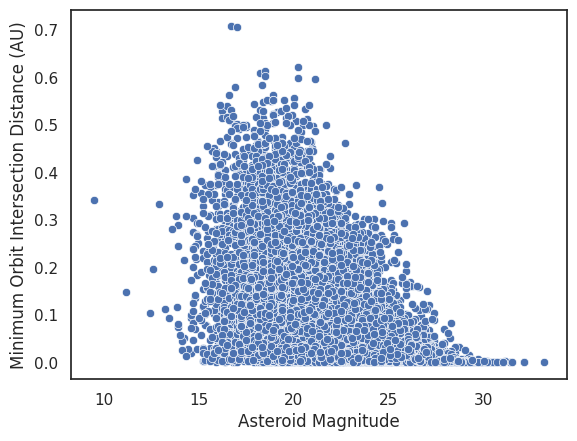

In [11]:
scatterplot1 = sns.scatterplot(data=df_ank, x='Asteroid Magnitude', y='Minimum Orbit Intersection Distance (AU)' )

scatterplot1

### Observations from Magnitude-MIOD plot

There does not seem to be a clear correlation between the MIOD and Magnitude of the asteroid from the scatter plot. This suggests that while asteroids with greater magnitudes are more likely to be hazardous to Earth, their magnitudes are not related to their distance from Earth.

### Observations from Orbit-MIOD hexbin plot

Due to the the scatterplot being crowded, a hexbin plot is created to visualize the relationship between the MIOD and the orbit of the asteroid. This plot shows that most a a lot of asteroids with a MIOD of less than 0.05 AU have a magnitude from between 22.5 to 27.5. This suggests that Asteroids with magnitudes in this range are more likely to be hazardous to Earth.

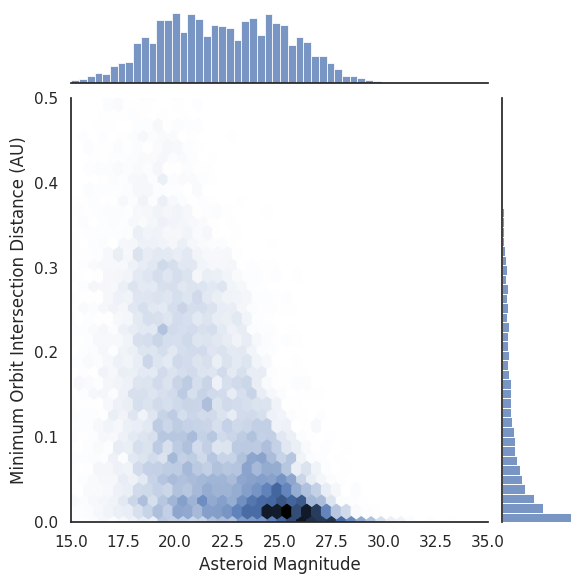

In [18]:
sns.set_theme(style="white")
hexplot_MIOD_Magnitude = sns.jointplot(data=df_ank, x='Asteroid Magnitude', y='Minimum Orbit Intersection Distance (AU)', kind='hex',xlim=(15,35), ylim=(0,0.5))


### Since a range worth studying has been identified, the data is filtered to only include asteroids with a magnitude between 22.5 and 27.5.

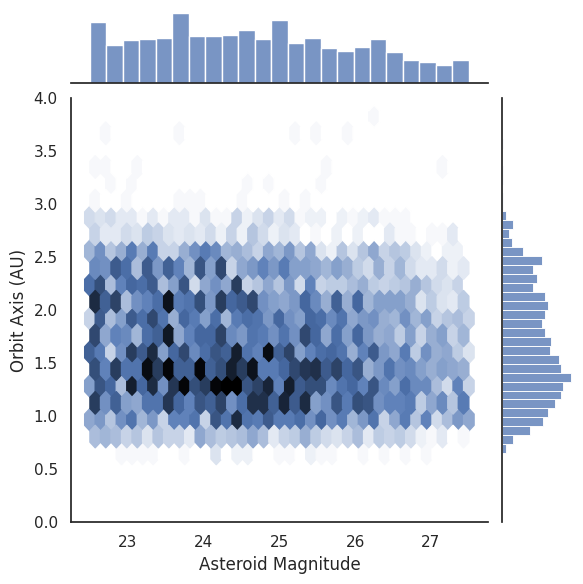

In [33]:
df_ank_filtered = df_ank[df_ank["Asteroid Magnitude"].between(22.5, 27.5)]
df_ank_filtered
hexplot_magnituderange_Orbitaxix = sns.jointplot(data=df_ank_filtered, x='Asteroid Magnitude', y='Orbit Axis (AU)', kind='hex', ylim=(0,4))

### There does not seem to be any correlation between the Magnitude of the Asteroid and the Orbit Axis.

## Analysis Plan

Test each of the columns in the data set to see if there is a correlation between the MIOD and the column. After finding the columns that have a correlation, develop a method to compare all of the correlated values to the MIOD. 